# Noisy Bootstrapped Aggregation ('Bagging') Duelling Double Deep Q Learning - A simple hospital model

In this example we take the previous example of Bagging Duelling Double Q Learning and add 'noisy layers' to the estimatin of advantage. Adding noise within the network is an alterantive to epsilon-greedy exploration. As the performance of the system improves the amount of noise will reduce in the network, as noise is a parameter in the network which is optimised through the normal network optimization procedure. 

## A simple hospital simulation model

This is an example of a simple hospital bed model where a Reinforcement learning (RL) agent has to learn how to manage the bed stock:

    • Default arrivals = 50/day
    • Weekend arrival numbers are 50% average arrival numbers
    • Weekday arrival numbers are 120% average arrival numbers
    • Distribution of inter-arrival time is inverse exponential
    • Average length of stay is 7 days (default)
    • Distribution of length of stay is inverse exponential
    • The RL agent may request a change in bed numbers once a day (default)
    • The allowed bed change requests are -20, -10, 0, 10, 20
    • Bed changes take 2 days to occur (default)
    • The RL agent receives a reward at each action based on the number of free beds or number of patients without a bed
    • The simulation is loaded with the average number of patients present
    
The RL agent must learn to maximise the long term reward (return). The maximum reward = 0, so the agent is learning to minimise the loss for each unoccupied bed or patient without bed.

## Reinforcement learning introduction

### RL involves:
* Trial and error search
* Receiving and maximising reward (often delayed)
* Linking state -> action -> reward
* Must be able to sense something of their environment
* Involves uncertainty in sensing and linking action to reward
* Learning -> improved choice of actions over time
* All models find a way to balance best predicted action vs. exploration

### Elements of RL
* *Environment*: all observable and unobservable information relevant to us
* *Observation*: sensing the environment
* *State*: the perceived (or perceivable) environment 
* *Agent*: senses environment, decides on action, receives and monitors rewards
* *Action*: may be discrete (e.g. turn left) or continuous (accelerator pedal)
* *Policy* (how to link state to action; often based on probabilities)
* *Reward signal*: aim is to accumulate maximum reward over time
* *Value function* of a state: prediction of likely/possible long-term reward
* *Q*: prediction of likely/possible long-term reward of an *action*
* *Advantage*: The difference in Q between actions in a given state (sums to zero for all actions)
* *Model* (optional): a simulation of the environment

### Types of model

* *Model-based*: have model of environment (e.g. a board game)
* *Model-free*: used when environment not fully known
* *Policy-based*: identify best policy directly
* *Value-based*: estimate value of a decision
* *Off-policy*: can learn from historic data from other agent
* *On-policy*: requires active learning from current decisions


## Duelling Deep Q Networks for Reinforcement Learning

Q = The expected future rewards discounted over time. This is what we are trying to maximise.

The aim is to teach a network to take the current state observations and recommend the action with greatest Q.

Duelling is very similar to Double DQN, except that the policy net splits into two. One component reduces to a single value, which will model the state *value*. The other component models the *advantage*, the difference in Q between different actions (the mean value is subtracted from all values, so that the advtantage always sums to zero). These are aggregated to produce Q for each action. 

<img src="./images/duelling_dqn.png" width="500"/>

Q is learned through the Bellman equation, where the Q of any state and action is the immediate reward achieved + the discounted maximum Q value (the best action taken) of next best action, where gamma is the discount rate.

$$Q(s,a)=r + \gamma.maxQ(s',a')$$

## Key DQN components

<img src="./images/dqn_components.png" width="700"/>


## General method for Q learning:

Overall aim is to create a neural network that predicts Q. Improvement comes from improved accuracy in predicting 'current' understood Q, and in revealing more about Q as knowledge is gained (some rewards only discovered after time).

<img src="./images/dqn_process.png" width="600|"/>
    
Target networks are used to stabilise models, and are only updated at intervals. Changes to Q values may lead to changes in closely related states (i.e. states close to the one we are in at the time) and as the network tries to correct for errors it can become unstable and suddenly lose signficiant performance. Target networks (e.g. to assess Q) are updated only infrequently (or gradually), so do not have this instability problem.

## Training networks

Double DQN contains two networks. This ammendment, from simple DQN, is to decouple training of Q for current state and target Q derived from next state which are closely correlated when comparing input features.

The *policy network* is used to select action (action with best predicted Q) when playing the game.

When training, the predicted best *action* (best predicted Q) is taken from the *policy network*, but the *policy network* is updated using the predicted Q value of the next state from the *target network* (which is updated from the policy network less frequently). So, when training, the action is selected using Q values from the *policy network*, but the the *policy network* is updated to better predict the Q value of that action from the *target network*. The *policy network* is copied across to the *target network* every *n* steps (e.g. 1000).

<img src="./images/dqn_training.png" width="700|"/>

## Bagging (Bootstrap Aggregation)

Each network is trained from the same memory, but have different starting weights and are trained on different bootstrap samples from that memory. In this example actions are chosen randomly from each of the networks (an alternative could be to take the most common action recommended by the networks, or an average output). This bagging method may also be used to have some measure of uncertainty of action by looking at the distribution of actions recommended from the different nets. Bagging may also be used to aid exploration during stages where networks are providing different suggested action.

<img src="./images/bagging.png" width="800|"/>

## Noisy layers

Noisy layers are an alternative to epsilon-greedy exploration (here, we leave the epsilon-greedy code in the model, but set it to reduce to zero immediately after the period of fully random action choice).

For every weight in the layer we have a random value that we draw from the normal distribution. This random value is used to add noise to the output. The parameters for the extent of noise for each weight, sigma, are stored within the layer and get trained as part of the standard back-propogation.

A modification to normal nosiy layers is to use layers with ‘factorized gaussian noise’. This reduces the number of random numbers to be sampled (so is less computationally expensive). There are two random vectors, one with the size of the input, and the other with the size of the output. A random matrix is created by calculating the outer product of the two vectors.

## References

Double DQN: 
van Hasselt H, Guez A, Silver D. (2015) Deep Reinforcement Learning with Double Q-learning. arXiv:150906461 http://arxiv.org/abs/1509.06461

Bagging:
Osband I, Blundell C, Pritzel A, et al. (2016) Deep Exploration via Bootstrapped DQN. arXiv:160204621 http://arxiv.org/abs/1602.04621

Noisy networks:
Fortunato M, Azar MG, Piot B, et al. (2019) Noisy Networks for Exploration. arXiv:170610295 http://arxiv.org/abs/1706.10295

Code for the nosiy layers comes from:

Lapan, M. (2020). Deep Reinforcement Learning Hands-On: Apply modern RL methods to practical problems of chatbots, robotics, discrete optimization, web automation, and more, 2nd Edition. Packt Publishing.


## Code structure

<img src="./images/dqn_program_structure.png" width="700|"/>

In [1]:
################################################################################
#                           1 Import packages                                  #
################################################################################

from simpy_envs.env_simple_hospital_bed_1 import HospGym

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

# Use a double ended queue (deque) for memory
# When memory is full, this will replace the oldest value with the new one
from collections import deque

# Supress all warnings (e.g. deprecation warnings) for regular use
import warnings
warnings.filterwarnings("ignore")

In [2]:
################################################################################
#                           2 Define model parameters                          #
################################################################################

# Set whether to display on screen (slows model)
DISPLAY_ON_SCREEN = False
# Discount rate of future rewards
GAMMA = 0.95
# Learing rate for neural network
LEARNING_RATE = 0.0003
# Maximum number of game steps (state, action, reward, next state) to keep
MEMORY_SIZE = 1000000
# Sample batch size for policy network update
BATCH_SIZE = 3
# Number of game steps to play before starting training (all random actions)
REPLAY_START_SIZE = 365 * 5
# Time step between actions
TIME_STEP = 1
# Number of steps between policy -> target network update
SYNC_TARGET_STEPS = 365
# Exploration rate (episolon) is probability of choosign a random action
EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.0
# Reduction in epsilon with each game step
EXPLORATION_DECAY = 0.0
# Simulation duration
SIM_DURATION = 365
# Training episodes
TRAINING_EPISODES = 100
# Set number of parallel networks
NUMBER_OF_NETS = 5

In [3]:
################################################################################
#                 3 Define DQN (Duelling Deep Q Network) class                 #
#                    (Used for both policy and target nets)                    #
################################################################################

"""
Code for nosiy layers comes from:

Lapan, M. (2020). Deep Reinforcement Learning Hands-On: Apply modern RL methods 
to practical problems of chatbots, robotics, discrete optimization, 
web automation, and more, 2nd Edition. Packt Publishing.
"""


class NoisyLinear(nn.Linear):
    """
    Noisy layer for network.
    
    For every weight in the layer we have a random value that we draw from the
    normal distribution.Paraemters for the noise, sigma, are stored within the
    layer and get trained as part of the standard back-propogation.
    
    'register_buffer' is used to create tensors in the network that are not
    updated during back-propogation. They are used to create normal 
    distributions to add noise (multiplied by sigma which is a paramater in the
    network).
    """
    
    def __init__(self, in_features, out_features,
                 sigma_init=0.017, bias=True):
        super(NoisyLinear, self).__init__(
            in_features, out_features, bias=bias)
        w = torch.full((out_features, in_features), sigma_init)
        self.sigma_weight = nn.Parameter(w)
        z = torch.zeros(out_features, in_features)
        self.register_buffer("epsilon_weight", z)
        if bias:
            w = torch.full((out_features,), sigma_init)
            self.sigma_bias = nn.Parameter(w)
            z = torch.zeros(out_features)
            self.register_buffer("epsilon_bias", z)
        self.reset_parameters()

    def reset_parameters(self):
        std = math.sqrt(3 / self.in_features)
        self.weight.data.uniform_(-std, std)
        self.bias.data.uniform_(-std, std)

    def forward(self, input):
        self.epsilon_weight.normal_()
        bias = self.bias
        if bias is not None:
            self.epsilon_bias.normal_()
            bias = bias + self.sigma_bias * \
                   self.epsilon_bias.data
        v = self.sigma_weight * self.epsilon_weight.data + self.weight
        return F.linear(input, v, bias)
    

class NoisyFactorizedLinear(nn.Linear):
    """
    NoisyNet layer with factorized gaussian noise. This reduces the number of
    random numbers to be sampled (so less computationally expensive). There are 
    two random vectors. One with the size of the input, and the other with the 
    size of the output. A random matrix is create by calculating the outer 
    product of the two vectors.
    
    'register_buffer' is used to create tensors in the network that are not
    updated during back-propogation. They are used to create normal 
    distributions to add noise (multiplied by sigma which is a paramater in the
    network).
    """
    def __init__(self, in_features, out_features,
                 sigma_zero=0.4, bias=True):
        super(NoisyFactorizedLinear, self).__init__(
            in_features, out_features, bias=bias)
        sigma_init = sigma_zero / math.sqrt(in_features)
        w = torch.full((out_features, in_features), sigma_init)
        self.sigma_weight = nn.Parameter(w)
        z1 = torch.zeros(1, in_features)
        self.register_buffer("epsilon_input", z1)
        z2 = torch.zeros(out_features, 1)
        self.register_buffer("epsilon_output", z2)
        if bias:
            w = torch.full((out_features,), sigma_init)
            self.sigma_bias = nn.Parameter(w)

    def forward(self, input):
        self.epsilon_input.normal_()
        self.epsilon_output.normal_()

        func = lambda x: torch.sign(x) * torch.sqrt(torch.abs(x))
        eps_in = func(self.epsilon_input.data)
        eps_out = func(self.epsilon_output.data)

        bias = self.bias
        if bias is not None:
            bias = bias + self.sigma_bias * eps_out.t()
        noise_v = torch.mul(eps_in, eps_out)
        v = self.weight + self.sigma_weight * noise_v
        return F.linear(input, v, bias)

class DQN(nn.Module):

    """Deep Q Network. Udes for both policy (action) and target (Q) networks."""

    def __init__(self, observation_space, action_space, neurons_per_layer=48):
        """Constructor method. Set up neural nets."""

        # Set starting exploration rate
        self.exploration_rate = EXPLORATION_MAX
        
        # Set up action space (choice of possible actions)
        self.action_space = action_space
              
        
        # First layerswill be common to both Advantage and value
        super(DQN, self).__init__()
        self.feature = nn.Sequential(
            nn.Linear(observation_space, neurons_per_layer),
            nn.ReLU()            
            )
        
        # Advantage has same number of outputs as the action space
        self.advantage = nn.Sequential(
            NoisyFactorizedLinear(neurons_per_layer, neurons_per_layer),
            nn.ReLU(),
            NoisyFactorizedLinear(neurons_per_layer, action_space)
            )
        
        # State value has only one output (one value per state)
        self.value = nn.Sequential(
            nn.Linear(neurons_per_layer, neurons_per_layer),
            nn.ReLU(),
            nn.Linear(neurons_per_layer, 1)
            )        
        
    def act(self, state):
        """Act either randomly or by redicting action that gives max Q"""
        
        # Act randomly if random number < exploration rate
        if np.random.rand() < self.exploration_rate:
            action = random.randrange(self.action_space)
            
        else:
            # Otherwise get predicted Q values of actions
            q_values = self.forward(torch.FloatTensor(state))
            # Get index of action with best Q
            action = np.argmax(q_values.detach().numpy()[0])
        
        return  action
        
  
    def forward(self, x):
        x = self.feature(x)
        advantage = self.advantage(x)
        value = self.value(x)
        action_q = value + advantage - advantage.mean()
        return action_q

In [4]:
################################################################################
#                    4 Define policy net training function                     #
################################################################################

def optimize(policy_net, target_net, memory):
    """
    Update  model by sampling from memory.
    Uses policy network to predict best action (best Q).
    Uses target network to provide target of Q for the selected next action.
    """
      
    # Do not try to train model if memory is less than reqired batch size
    if len(memory) < BATCH_SIZE:
        return    
 
    # Reduce exploration rate (exploration rate is stored in policy net)
    policy_net.exploration_rate *= EXPLORATION_DECAY
    policy_net.exploration_rate = max(EXPLORATION_MIN, 
                                      policy_net.exploration_rate)
    # Sample a random batch from memory
    batch = random.sample(memory, BATCH_SIZE)
    for state, action, reward, state_next, terminal in batch:
        
        state_action_values = policy_net(torch.FloatTensor(state))
        
        # Get target Q for policy net update
       
        if not terminal:
            # For non-terminal actions get Q from policy net
            expected_state_action_values = policy_net(torch.FloatTensor(state))
            # Detach next state values from gradients to prevent updates
            expected_state_action_values = expected_state_action_values.detach()
            # Get next state action with best Q from the policy net (double DQN)
            policy_next_state_values = policy_net(torch.FloatTensor(state_next))
            policy_next_state_values = policy_next_state_values.detach()
            best_action = np.argmax(policy_next_state_values[0].numpy())
            # Get target net next state
            next_state_action_values = target_net(torch.FloatTensor(state_next))
            # Use detach again to prevent target net gradients being updated
            next_state_action_values = next_state_action_values.detach()
            best_next_q = next_state_action_values[0][best_action].numpy()
            updated_q = reward + (GAMMA * best_next_q)      
            expected_state_action_values[0][action] = updated_q
        else:
            # For termal actions Q = reward (-1)
            expected_state_action_values = policy_net(torch.FloatTensor(state))
            # Detach values from gradients to prevent gradient update
            expected_state_action_values = expected_state_action_values.detach()
            # Set Q for all actions to reward (-1)
            expected_state_action_values[0] = reward
 
        # Set network to training mode
        policy_net.train()
        # Reset net gradients
        policy_net.optimizer.zero_grad()  
        # calculate loss
        loss_v = nn.MSELoss()(state_action_values, expected_state_action_values)
        # Backpropogate loss
        loss_v.backward()
        # Update network gradients
        policy_net.optimizer.step()  

    return

In [5]:
################################################################################
#                            5 Define memory class                             #
################################################################################

class Memory():
    """
    Replay memory used to train model.
    Limited length memory (using deque, double ended queue from collections).
      - When memory full deque replaces oldest data with newest.
    Holds, state, action, reward, next state, and episode done.
    """
    
    def __init__(self):
        """Constructor method to initialise replay memory"""
        self.memory = deque(maxlen=MEMORY_SIZE)

    def remember(self, state, action, reward, next_state, done):
        """state/action/reward/next_state/done"""
        self.memory.append((state, action, reward, next_state, done))

In [6]:
################################################################################
#                       6  Define results plotting function                    #
################################################################################

def plot_results(run, exploration, score, run_details):
    """Plot and report results at end of run"""
    
    # Get beds and patients from run_detals DataFrame
    beds = run_details['beds']
    patients = run_details['patients']    
    
    # Set up chart (ax1 and ax2 share x-axis to combine two plots on one graph)
    fig = plt.figure(figsize=(9,5))
    ax1 = fig.add_subplot(121)
    ax2 = ax1.twinx()
    
    # Plot results
    average_rewards = np.array(score)/SIM_DURATION
    ax1.plot(run, exploration, label='exploration', color='g')
    ax2.plot(run, average_rewards, label='average reward', color='r')
    
    # Set axes
    ax1.set_xlabel('run')
    ax1.set_ylabel('exploration', color='g')
    ax2.set_ylabel('average reward', color='r')
    
    # Show last run tracker of beds and patients

    ax3 = fig.add_subplot(122)
    day = np.arange(len(beds))*TIME_STEP
    ax3.plot(day, beds, label='beds', color='g')
    ax3.plot(day, patients, label='patients', color='r')
    
    # Set axes
    ax3.set_xlabel('day')
    ax3.set_ylabel('beds/patients')
    ax3.set_ylim(0)
    ax3.legend()
    ax3.grid()
    # Show
    
    plt.tight_layout(pad=2)
    plt.show()
    
    # Calculate summary results
    results = pd.Series()
    beds = np.array(beds)
    patients = np.array(patients)
    results['days under capacity'] = np.sum(patients > beds)
    results['days over capacity'] = np.sum(beds > patients)
    results['average patients'] = np.round(np.mean(patients), 0)
    results['average beds'] = np.round(np.mean(beds), 0)
    results['% occupancy'] = np.round((patients.sum() / beds.sum() * 100), 1)
    print (results);

In [7]:
################################################################################
#                                 7 Main program                               #
################################################################################


def hosp_bed_management():
    """Main program loop"""
    
    ############################################################################
    #                          8 Set up environment                            #
    ############################################################################
        
    # Set up game environemnt
    sim = HospGym(sim_duration=SIM_DURATION, time_step=TIME_STEP)

    # Get number of observations returned for state
    observation_space = sim.observation_size
    
    # Get number of actions possible
    action_space = sim.action_size
    
    ############################################################################
    #                    9 Set up policy and target nets                       #
    ############################################################################
    
    # Set up policy and target neural nets
    policy_nets = [DQN(observation_space, action_space)
                   for i in range(NUMBER_OF_NETS)]
    target_nets = [DQN(observation_space, action_space)
                   for i in range(NUMBER_OF_NETS)]
    
    # Set optimizer, copy weights from policy_net to target, and 
    for i in range(NUMBER_OF_NETS):
        # Set optimizer
        policy_nets[i].optimizer = optim.Adam(
            params=policy_nets[i].parameters(), lr=LEARNING_RATE)
        # Copy weights from policy -> target
        target_nets[i].load_state_dict(policy_nets[i].state_dict())
        # Set target net to eval rather than training mode
        target_nets[i].eval() 
    
    ############################################################################
    #                            10 Set up memory                              #
    ############################################################################
        
    # Set up memomry
    memory = Memory()
    
    ############################################################################
    #                     11 Set up + start training loop                      #
    ############################################################################
    
    # Set up run counter and learning loop    
    run = 0
    all_steps = 0
    continue_learning = True
    
    # Set up list for results
    results_run = []
    results_exploration = []
    results_score = []
    
    # Continue repeating games (episodes) until target complete
    while continue_learning:
        
        ########################################################################
        #                           12 Play episode                            #
        ########################################################################
        
        # Increment run (episode) counter
        run += 1
        
        ########################################################################
        #                             13 Reset game                            #
        ########################################################################
        
        # Reset game environment and get first state observations
        state = sim.reset()
        
        # Trackers for state
        weekday = []
        beds = []
        patients = []
        spare_beds = []
        pending_change = []
        rewards = [] 
        
        # Reset total reward
        total_reward = 0    
   
        # Reshape state into 2D array with state obsverations as first 'row'
        state = np.reshape(state, [1, observation_space])
        
        # Continue loop until episode complete
        while True:
            
        ########################################################################
        #                       14 Game episode loop                           #
        ########################################################################

            ####################################################################
            #                       15 Get action                              #
            ####################################################################
            
            # Get actions to take (use evalulation mode)
            actions = []
            for i in range(NUMBER_OF_NETS):
                policy_nets[i].eval()
                actions.append(policy_nets[i].act(state))
                
            # Randomly choose an action from net actions
            random_index = random.randint(0, NUMBER_OF_NETS - 1)
            action = actions[random_index]     
            
            ####################################################################
            #                 16 Play action (get S', R, T)                    #
            ####################################################################
            
            # Act
            state_next, reward, terminal, info = sim.step(action)
            total_reward += reward
            
            # Update trackers
            weekday.append(state_next[0])
            beds.append(state_next[1])
            patients.append(state_next[2])
            spare_beds.append(state_next[3])
            pending_change.append(state_next[4])
            rewards.append(reward)
                                                          
            # Reshape state into 2D array with state obsverations as first 'row'
            state_next = np.reshape(state_next, [1, observation_space])
            
            # Update display if needed
            if DISPLAY_ON_SCREEN:
                sim.render()
            
            ####################################################################
            #                  17 Add S/A/R/S/T to memory                      #
            ####################################################################
            
            # Record state, action, reward, new state & terminal
            memory.remember(state, action, reward, state_next, terminal)
            
            # Update state
            state = state_next
            
            ####################################################################
            #                  18 Check for end of episode                     #
            ####################################################################
            
            # Actions to take if end of game episode
            if terminal:
                # Print results
                # Get exploration rate
                exploration = policy_nets[0].exploration_rate
                # Clear print row content
                clear_row = '\r' + ' '*79 + '\r'
                print (clear_row, end ='')
                print (f'Run: {run}, ', end='')
                print (f'Exploration: {exploration: .3f}, ', end='')
                average_reward = total_reward/SIM_DURATION
                print (f'Average reward: {average_reward:4.1f}', end='')
                # Add results to lists
                results_run.append(run)
                results_exploration.append(exploration)
                results_score.append(total_reward)

                
                ################################################################
                #             18b Check for end of learning                    #
                ################################################################
                
                if run == TRAINING_EPISODES:
                    continue_learning = False
                
                # End episode loop
                break
            
            
            ####################################################################
            #                        19 Update policy net                      #
            ####################################################################
            
            # Avoid training model if memory is not of sufficient length
            if len(memory.memory) > REPLAY_START_SIZE:
        
                # Update policy net
                for i in range(NUMBER_OF_NETS):
                    optimize(policy_nets[i], target_nets[i], memory.memory)

                ################################################################
                #             20 Update target net periodically                #
                ################################################################
                
                # Use load_state_dict method to copy weights from policy net
                if all_steps % SYNC_TARGET_STEPS == 0:
                    for i in range(NUMBER_OF_NETS):
                        target_nets[i].load_state_dict(
                            policy_nets[i].state_dict())
                
    ############################################################################
    #                      21 Learning complete - plot results                 #
    ############################################################################

    # Add last run to DataFrame. summarise, and return
    run_details = pd.DataFrame()
    run_details['weekday'] = weekday 
    run_details['beds'] = beds
    run_details['patients'] = patients
    run_details['spare_beds'] = spare_beds
    run_details['pending_change'] = pending_change
    run_details['reward'] = rewards    
        
    # Target reached. Plot results
    plot_results(
        results_run, results_exploration, results_score, run_details)
    
    return run_details

Run: 100, Exploration:  0.000, Average reward: -40.1                           

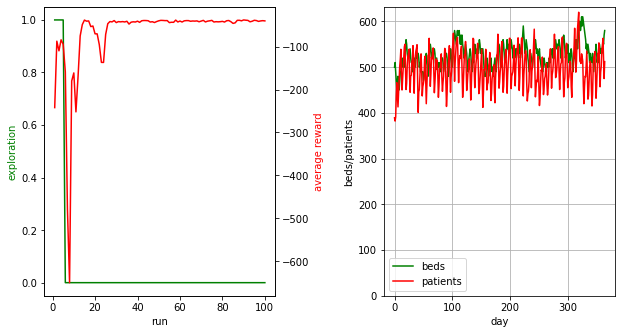

days under capacity    116.0
days over capacity     245.0
average patients       496.0
average beds           526.0
% occupancy             94.3
dtype: float64


In [8]:
# Run model and return last run results by day
last_run = hosp_bed_management()